In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
from Genetic_Rehearsal import *

Using TensorFlow backend.


# Training a model on original data

It has the following steps

1. Load the original data
2. Create a model
3. Train the model on original data

## Load the original data

In [4]:
import keras
from keras.datasets import fashion_mnist
import numpy as np

(x_train_h, y_train_h), (x_test_h, y_test_h) = fashion_mnist.load_data()

x_train_h = x_train_h/255
x_test_h = x_test_h/255

y_train_h = np.copy(y_train_h)
y_test_h = np.copy(y_test_h)

x_train_h = np.reshape(x_train_h,(60000,28,28,1))
x_test_h = np.reshape(x_test_h,(10000,28,28,1))

pre_y_train_h = y_train_h
pre_y_test_h = y_test_h

y_test_h = keras.utils.to_categorical(y_test_h, 20)
y_train_h = keras.utils.to_categorical(y_train_h, 20)

x_train_h = np.reshape(x_train_h,(60000,784))
x_test_h = np.reshape(x_test_h,(10000,784))

4423680/4422102 [==============================] - 1s 0us/step


## Create the model

In [5]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, Activation, Dropout, MaxPooling2D

model = Sequential()

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(20))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## Train the model on original data

In [7]:
history_original = model.fit(x_train_h,y_train_h,verbose=1,epochs=30,batch_size=100,validation_data=(x_test_h,y_test_h))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 59us/step - loss: 0.5511 - accuracy: 0.8000 - val_loss: 0.4606 - val_accuracy: 0.8285
Epoch 2/30
60000/60000 [==============================] - 4s 59us/step - loss: 0.3790 - accuracy: 0.8605 - val_loss: 0.4059 - val_accuracy: 0.8540
Epoch 3/30
60000/60000 [==============================] - 3s 55us/step - loss: 0.3389 - accuracy: 0.8732 - val_loss: 0.3590 - val_accuracy: 0.8670
Epoch 4/30
60000/60000 [==============================] - 3s 58us/step - loss: 0.3122 - accuracy: 0.8837 - val_loss: 0.3434 - val_accuracy: 0.8748
Epoch 5/30
60000/60000 [==============================] - 3s 54us/step - loss: 0.2901 - accuracy: 0.8918 - val_loss: 0.3450 - val_accuracy: 0.8748
Epoch 6/30
60000/60000 [==============================] - 3s 55us/step - loss: 0.2743 - accuracy: 0.8974 - val_loss: 0.3368 - val_accuracy: 0.8746
Epoch 7/30
60000/60000 [==============================] - 3s 55us/st

# Train the model on Genetic data

Training on genetic data has the following steps

1. Create the genetic data
2. Enrich the generated data
3. Create a model 
4. Train the model on the data

## Creating the genetic data

In [0]:
population_size=16
NUMBER_OF_CULTURES = 30
NUMBER_OF_GENERATIONS = 100
MUTATION_PROBABILITY = 0.1
MUTATION_TYPE = "+"

#Three times of mutations are possible. +,-,*.

In [9]:
from heapq import nlargest
import random

pseudo_x_train_2400 = np.zeros((0,784))

POINTS_GATHERED = []
ideal_points = []
#MUTATION_PROBABILITY

for class_number in range(10):
  POINTS_COUNTER=0
  print("Class number: ", class_number)

  for p in range(NUMBER_OF_CULTURES): #30 This loop is responsible for increasing samples per class.

    # CREATING THE INITIAL POPULATION
    # VERIFIED
    current_generation=[]
    for i in range(population_size):
      # current_generation.append(np.zeros((28,28,1)))
      # current_generation.append(np.zeros((32,32,1)))
      current_generation.append(np.zeros((784)))

      # sample = np.zeros((784,1))
      # # sample[random.choice([i for i in range(255)])] = 10
      # current_generation.append(sample)

      # current_generation.append(np.random.rand(784))
      # current_generation.append(np.mean(x_train[np.where(pre_y_train == class_number)],axis=0))
    
    best = 0
    # best_softmax = 0 # TEST CODE
    best_list=[]

    # while True:
    while best*100 < 99:
    # for generation_number in range(NUMBER_OF_GENERATIONS):
      current_generation_fitness=[]
      # current_generation_softmax_score=[]
      
      # VERIFIED - ACTUAL CODE
      # print(" ")
      for i in range(population_size):

      #   # test_point = np.reshape(current_generation[i],(1,28,28,1))
        # test_point = np.reshape(current_generation[i],(1,32,32,1))
      #   # test_point = np.reshape(current_generation[i],(1,2))
        test_point = np.reshape(current_generation[i],(1,784))

        fitness_score = model.predict(test_point)[0][class_number]
        class_prediction= model.predict_classes(test_point)
        # print("Fitness: ",fitness_score," Prediction: ",class_prediction, "organism: ",i)
        # if class_prediction == class_number and i >= int(population_size/4):

        #   # ideal_points.append(np.reshape(test_point,(28,28,1)))
        #   # ideal_points.append(np.reshape(test_point,(2,)))
        #   ideal_points.append(np.reshape(test_point,(784,)))

        #   POINTS_COUNTER += 1
        #   print("Fitness: ",fitness_score," Prediction: ",class_prediction, "organism: ",i)
        current_generation_fitness.append(fitness_score)


      # TEST CODE
      # for i in range(population_size):
      #   test_point = np.reshape(current_generation[i],(1,28,28,1))

      #   softmax_vector = model.predict(test_point)[0]
      #   softmax_score = softmax_vector[class_number]
      #   fitness_score = softmax_score*100 + (1/np.std(softmax_vector)) 
      #   print("Fitness score: ", fitness_score, "softmax score: ",softmax_score, "std variable: ",(1/np.std(softmax_vector)))

      #   current_generation_fitness.append(fitness_score)
      #   current_generation_softmax_score.append(softmax_score)

      # TEST CODE 2
      # for i in range(population_size):
        # test_point = np.reshape(current_generation[i],(1,28,28,1))

      #   softmax_vector = model.predict(test_point)[0]
      #   softmax_score = softmax_vector[class_number]
      #   fitness_score = (1/np.std(softmax_vector)) 
      #   # print("Fitness score: ", fitness_score, "std variable: ",(1/np.std(softmax_vector)))
      #   current_generation_fitness.append(fitness_score)
        # current_generation_softmax_score.append(softmax_score)

      # print(current_generation_fitness)
      if max(current_generation_fitness) >= best:
        best = max(current_generation_fitness)

      # TEST CODE
      # if max(current_generation_softmax_score) >= best_softmax:
      #   best_softmax = max(current_generation_softmax_score)
      
      print("Best: ",best*100, " Culture number: ",p," Class number: ",class_number)
      # print("Fitness score: ",best,"std: ",(1/best)," Generation number: ",generation_number, " Culture number: ",p," Class number: ",class_number)
      

      # VERIFIED
      # print("Number of duplicates: ",duplicate_remover(current_generation,current_generation_fitness))
      fittest_four_model_indices = nlargest(int(population_size/4), range(len(current_generation_fitness)), current_generation_fitness.__getitem__)
      # fittest_four_model_indices = roulette_selection(current_generation_fitness,verbose=0)
  
      # VERIFIED
      temp_list=[]
      for temp in range(int(population_size/4)):
        temp_list.append(np.copy(current_generation[fittest_four_model_indices[temp]]))
      

      # VERIFIED
      for temp in range(int(population_size/4)):
        current_generation[temp] = np.copy(temp_list[temp])
     
  
      # Mutations
      # VERIFIED
      for temp in range((int(population_size/4)),(int(population_size/2))):
        current_generation[temp] = np.copy(current_generation[temp-(int(population_size/4))])
     
  
      # VERIFIED
      for i in range((int(population_size/4)),(int(population_size/2))):
        # point_mutation=np.random.choice([-0.5,1],size=current_generation[i].shape, p=[0.99,0.01])
        # point_mutation=np.random.choice([0,np.random.normal(0,1,[1])],size=current_generation[i].shape, p=[0.99,0.01])
        point_mutation=np.random.choice([0,abs(np.random.normal(0,1,[1]))],size=current_generation[i].shape, p=[(1-MUTATION_PROBABILITY),MUTATION_PROBABILITY])
        # point_mutation=np.random.choice([0,1],size=current_generation[i].shape, p=[0.9,0.1])

        if MUTATION_TYPE == "*":
          choice=random.choice(["+","-","*"])
          if choice== "-":
            current_generation[i] = current_generation[i] - point_mutation
          elif choice=="+":
            current_generation[i] = current_generation[i] + point_mutation
        elif MUTATION_TYPE == "+":
          current_generation[i] = current_generation[i] + point_mutation
        else:
          current_generation[i] = current_generation[i] - point_mutation
      
      
      # crossover
      # VERIFIED
      for temp in range((int(population_size/2)),(int(population_size*0.75))):
        current_generation[temp] = np.copy(current_generation[temp-(int(population_size/2))])
     
  
      # VERIFIED
      for temp in range((int(population_size/2)),(int(population_size*0.75))):
        if temp%2 == 0:
          crossover(current_generation[temp],current_generation[temp+1],int((current_generation[temp].shape)[0]/2))
      # crossover(current_generation[10],current_generation[11],int((current_generation[10].shape)[0]/2))
  
      # mutated crossover
      # VERIFIED
      for temp in range((int(population_size*0.75)),population_size):
        current_generation[temp] = np.copy(current_generation[temp-(int(population_size/2))])
  
      # VERIFIED
      for temp in range((int(population_size*0.75)),population_size):
        if temp%2 == 0:
          crossover(current_generation[temp],current_generation[temp+1],int((current_generation[temp].shape)[0]/2))
    for k in range(len(current_generation)):
      # pseudo_x_train_2400 = np.vstack((pseudo_x_train_2400,np.reshape(current_generation[k],(1,28,28,1))))
      # pseudo_x_train_2400 = np.vstack((pseudo_x_train_2400,np.reshape(current_generation[k],(1,32,32,1))))
      # pseudo_x_train_2400 = np.vstack((pseudo_x_train_2400,np.reshape(current_generation[k],(1,2))))
      pseudo_x_train_2400 = np.vstack((pseudo_x_train_2400,np.reshape(current_generation[k],(1,784))))
    
#   POINTS_GATHERED.append(POINTS_COUNTER)
# print("Total number of points gathered: ",POINTS_GATHERED)
# print("Ideal points: ",len(ideal_points))
# print(np.array(ideal_points).shape)
# pseudo_x_train_2400 = np.vstack((pseudo_x_train_2400,ideal_points))
print("Generated data: ",pseudo_x_train_2400.shape)

Class number:  0
Best:  0.002519740337447729  Culture number:  0  Class number:  0
Best:  0.7107878569513559  Culture number:  0  Class number:  0
Best:  100.0  Culture number:  0  Class number:  0
Best:  0.002519740337447729  Culture number:  1  Class number:  0
Best:  67.89776086807251  Culture number:  1  Class number:  0
Best:  87.88888454437256  Culture number:  1  Class number:  0
Best:  99.36361312866211  Culture number:  1  Class number:  0
Best:  0.002519740337447729  Culture number:  2  Class number:  0
Best:  100.0  Culture number:  2  Class number:  0
Best:  0.002519740337447729  Culture number:  3  Class number:  0
Best:  93.87028217315674  Culture number:  3  Class number:  0
Best:  99.99971389770508  Culture number:  3  Class number:  0
Best:  0.002519740337447729  Culture number:  4  Class number:  0
Best:  99.99942779541016  Culture number:  4  Class number:  0
Best:  0.002519740337447729  Culture number:  5  Class number:  0
Best:  12.571220099925995  Culture number: 

In [10]:
from sklearn.utils import class_weight

print(pseudo_x_train_2400.shape)

pseudo_y_train_2400 = model.predict_classes(pseudo_x_train_2400)

pre_pseudo_y_train_2400 = pseudo_y_train_2400
pseudo_y_train_2400 = keras.utils.to_categorical(pseudo_y_train_2400, 10)
print("Training data shape: ",pseudo_x_train_2400.shape)
print("Training labels shape: ",pseudo_y_train_2400.shape)

(4800, 784)
Training data shape:  (4800, 784)
Training labels shape:  (4800, 10)


In [11]:
# SANITY CHECK

count = [0,0,0,0,0,0,0,0,0,0]
for i in range(pseudo_x_train_2400.shape[0]):
  count[pre_pseudo_y_train_2400[i]]+=1

print(count)
print(sum(count))

[494, 383, 382, 366, 320, 705, 554, 331, 836, 429]
4800


In [0]:
# pseudo_x_train_2400 = np.load("genetic_data.npy",allow_pickle=True)
# pseudo_y_train_2400 = np.load("genetic_labels.npy",allow_pickle=True)

## Enriching the genetic data

### Enrichment step 1

In [12]:
help(Enrichment)

Help on function Enrichment in module Genetic_Rehearsal:

Enrichment(data, labels, model, NUMBER_OF_CENTERS, NUMBER_OF_CLASSES, NUMBER_OF_SAMPLES)
    Enriches the given data by fitting a Gaussian Mixture model with
    NUMBER_OF_CENTERS and NUMBER_OF_SAMPLES



In [13]:
NUMBER_OF_SAMPLES = int(pseudo_x_train_2400.shape[0])*2
temp = Enrichment(pseudo_x_train_2400,pseudo_y_train_2400,model,10,10,NUMBER_OF_SAMPLES=NUMBER_OF_SAMPLES)

synthetic_data = temp[0]
synthetic_labels = temp[1]

print("Training data shape: ",synthetic_data.shape)
print("Training labels shape: ",synthetic_labels.shape)

9600/9600 [==============================] - 0s 37us/step
Training data shape:  (9600, 784)
Training labels shape:  (9600, 10)


In [14]:
# Sanity check:

count = [0,0,0,0,0,0,0,0,0,0]
for i in range(temp[2].shape[0]):
  count[temp[2][i]] += 1

print(count)
print(sum(count))

[1268, 717, 604, 522, 184, 1892, 1039, 455, 2112, 807]
9600


### Enrichment Step 2

In [15]:
NUMBER_OF_SAMPLES = 1000000

temp = Enrichment(synthetic_data,synthetic_labels,model,1,20,NUMBER_OF_SAMPLES)

new_synthetic_data = temp[0]
new_synthetic_labels = temp[1]

print("Training data shape: ",new_synthetic_data.shape)
print("Training labels shape: ",new_synthetic_labels.shape)

1000000/1000000 [==============================] - 34s 34us/step
Training data shape:  (1000000, 784)
Training labels shape:  (1000000, 20)


In [16]:
# Sanity check:

count = [0,0,0,0,0,0,0,0,0,0]
for i in range(temp[2].shape[0]):
  count[temp[2][i]] += 1

print(count)
print(sum(count))

[116799, 78744, 68452, 45232, 14986, 243714, 82761, 35890, 229645, 83777]
1000000


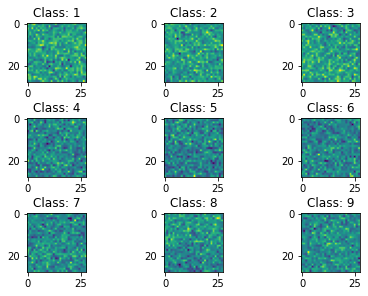

In [17]:
## DELETE THIS CELL BEFORE UPLOADING

import matplotlib.pyplot as plt
import random

fis, axs = plt.subplots(3,3)

index = 300
count = 0

for i in range(3):
  for j in range(3):
    count += 1
    index = random.choice([i for i in range(10000)])
    axs[i,j].set_title("Class: "+str(count))
    axs[i,j].imshow(np.reshape(new_synthetic_data[index],(28,28)))

fis.tight_layout(pad=0.3)

## Train the model on Genetic data

In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, Activation, Dropout, MaxPooling2D

model_genetic = Sequential()

model_genetic.add(Dense(512))
model_genetic.add(Activation('relu'))
model_genetic.add(Dropout(0.25))
model_genetic.add(Dense(256))
model_genetic.add(Activation('relu'))
model_genetic.add(Dense(20))
model_genetic.add(Activation('softmax'))
model_genetic.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [19]:
score = model_genetic.evaluate(x_test_h,y_test_h)
print(score[1])

history_genetic = model_genetic.fit(new_synthetic_data,new_synthetic_labels,verbose=1,epochs=30,batch_size=1000,validation_data=(x_test_h,y_test_h),shuffle=True)

10000/10000 [==============================] - 1s 73us/step
0.019500000402331352
Train on 1000000 samples, validate on 10000 samples
Epoch 1/30
1000000/1000000 [==============================] - 11s 11us/step - loss: 0.9016 - accuracy: 0.6665 - val_loss: 1.1845 - val_accuracy: 0.6842
Epoch 2/30
1000000/1000000 [==============================] - 11s 11us/step - loss: 0.6354 - accuracy: 0.7557 - val_loss: 1.0725 - val_accuracy: 0.7161
Epoch 3/30
1000000/1000000 [==============================] - 11s 11us/step - loss: 0.5608 - accuracy: 0.7824 - val_loss: 0.9514 - val_accuracy: 0.7343
Epoch 4/30
1000000/1000000 [==============================] - 11s 11us/step - loss: 0.5176 - accuracy: 0.7986 - val_loss: 0.8829 - val_accuracy: 0.7584
Epoch 5/30
1000000/1000000 [==============================] - 11s 11us/step - loss: 0.4883 - accuracy: 0.8092 - val_loss: 0.8200 - val_accuracy: 0.7761
Epoch 6/30
1000000/1000000 [==============================] - 11s 11us/step - loss: 0.4655 - accuracy: 0.81

In [0]:
# This is being done to save space and prevent the program from crashing

del new_synthetic_data
del new_synthetic_labels

# Agreement score

In [21]:
predictions_original = model.predict_classes(x_test_h)
predictions_genetic = model_genetic.predict_classes(x_test_h)

TEMP=agreement_score(predictions_original, predictions_genetic)

print("Agreement score for Original model with genetic model: ",TEMP[0])

Agreement score for Original model with genetic model:  84.8


# Plotting the graphs

In [24]:
print(history_genetic.history['val_accuracy'])

[0.6841999888420105, 0.7160999774932861, 0.7343000173568726, 0.758400022983551, 0.7760999798774719, 0.7907000184059143, 0.7892000079154968, 0.8008999824523926, 0.8083999752998352, 0.8095999956130981, 0.8046000003814697, 0.8197000026702881, 0.8126999735832214, 0.8129000067710876, 0.8119999766349792, 0.8116000294685364, 0.8169999718666077, 0.8090000152587891, 0.8134999871253967, 0.8109999895095825, 0.8120999932289124, 0.8205999732017517, 0.8072999715805054, 0.8138999938964844, 0.8079000115394592, 0.8166000247001648, 0.8222000002861023, 0.8102999925613403, 0.8123000264167786, 0.8154000043869019]


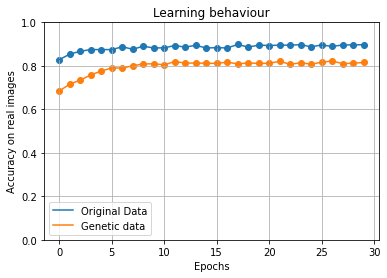

In [26]:
import matplotlib.pyplot as plt

plt.plot(range(len(history_original.history["val_accuracy"])),history_original.history["val_accuracy"],label="Original Data")
plt.scatter(range(len(history_original.history["val_accuracy"])),history_original.history["val_accuracy"])

plt.plot(range(len(history_genetic.history["val_accuracy"])),history_genetic.history["val_accuracy"],label="Genetic data")
plt.scatter(range(len(history_genetic.history["val_accuracy"])),history_genetic.history["val_accuracy"])

plt.grid()
plt.title("Learning behaviour")
plt.ylabel("Accuracy on real images")
plt.xlabel("Epochs")
plt.ylim(0,1)
plt.legend(loc="best")
plt.show()